In [1]:
import nltk, gensim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import hstack

In [2]:
#Instantiate and setup DataFrame
df = pd.read_csv('..\\data\\wrangled_data.csv')
df.set_index('LISTING_ID', inplace = True, drop = True)

In [3]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', min_df = 2, max_df = 0.7)
tfidf_data = tfidf_vectorizer.fit_transform(df.BODY)

In [4]:
tfidf_data

<126358x37899 sparse matrix of type '<class 'numpy.float64'>'
	with 10689809 stored elements in Compressed Sparse Row format>

In [5]:
features_unscaled = df.drop('BODY', axis = 1)
scaler = StandardScaler()
features = scaler.fit_transform(features_unscaled)

In [6]:
features_unscaled.head()

,PRICE,AREA_SQFT,ALLOWS_CATS,ALLOWS_DOGS
LISTING_ID,,,,
7075306172,2275,900.0,1.0,0.0
7075321793,2350,800.0,1.0,0.0
7075372720,2395,875.0,1.0,0.0
7075376264,2395,875.0,1.0,0.0
7075380613,2450,950.0,1.0,0.0


In [7]:
pd.DataFrame(features).head()

,0,1,2,3
0,0.285777,-0.196376,0.886683,-0.762854
1,0.369994,-0.616577,0.886683,-0.762854
2,0.420524,-0.301426,0.886683,-0.762854
3,0.420524,-0.301426,0.886683,-0.762854
4,0.482284,0.013725,0.886683,-0.762854


In [8]:
X_matrix = hstack((tfidf_data, features))

In [9]:
X_full = pd.DataFrame.sparse.from_spmatrix(X_matrix)

In [10]:
X_full.shape

(126358, 37903)

In [11]:
svd = TruncatedSVD(n_components = 275)
svd.fit(X_full)

TruncatedSVD(n_components=275)

In [12]:
var_explained = svd.explained_variance_ratio_.sum()
var_explained

0.89784280146161

In [61]:
components = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 50, 100, 250, 500]
var_explained_list = []

for number in components:
    svd = TruncatedSVD(n_components = number)
    svd.fit(X_full)
    var_explained_list.append(svd.explained_variance_ratio_.sum())

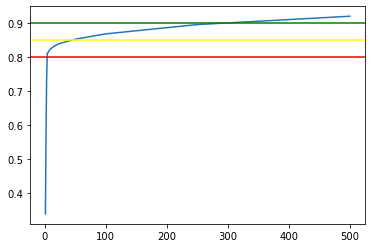

In [79]:
plt.plot(components, var_explained_list)
plt.axhline(0.9, color = 'green')
plt.axhline(0.85, color = 'yellow')
plt.axhline(0.8, color = 'red')

In [56]:
var_explained

[0.3400887871683541,
 0.5757617762435472,
 0.7349244055557762,
 0.8106222434839031,
 0.8114477543369769,
 0.8150637200770802,
 0.8182277026441616,
 0.8205013235936315,
 0.8226198209022504,
 0.8242898092630423,
 0.8309868174820269,
 0.8358415142866843,
 0.8395891690599387,
 0.8518368058776552,
 0.8674243613989111,
 0.8946188363207186,
 0.9189862720342054]

In [94]:
svd = TruncatedSVD(n_components = 50)
svd.fit(X_full)
var_explained = svd.explained_variance_ratio_.sum()
var_explained

0.8518464530779708

<BarContainer object of 50 artists>

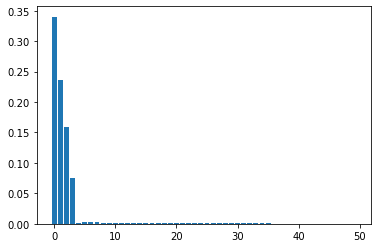

In [95]:
plt.bar(range(len(svd.explained_variance_ratio_)), svd.explained_variance_ratio_)

In [96]:
svd = TruncatedSVD(n_components = 10)
svd.fit(X_full)
var_explained = svd.explained_variance_ratio_.sum()
var_explained

0.8242898885491379

<BarContainer object of 10 artists>

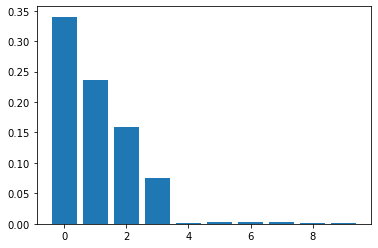

In [97]:
plt.bar(range(len(svd.explained_variance_ratio_)), svd.explained_variance_ratio_)

In [13]:
svd = TruncatedSVD(n_components = 4)
svd.fit(X_full)
var_explained = svd.explained_variance_ratio_.sum()
var_explained

0.8106222434839029

<BarContainer object of 4 artists>

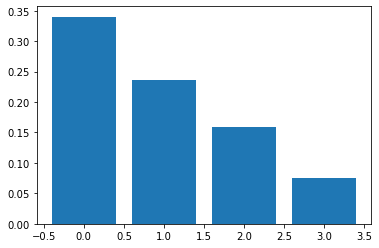

In [14]:
plt.bar(range(len(svd.explained_variance_ratio_)), svd.explained_variance_ratio_)

In [ ]:
# Set n_components based on % of explained variance or on the accuracy:computation tradeoff depicted in the chart?

In [15]:
X = svd.transform(X_full)

In [16]:
X.shape

(126358, 4)

In [ ]:
def get_recommendations(id, model, number, random = False):
    
    

#### K-Means

In [ ]:
#Determine number of clusters

In [44]:
inertia_list = []
K = range(1,50)
for k in K:
    km = KMeans(n_clusters = k, random_state = 33)
    km.fit(X)
    inertia_list.append(km.inertia_)

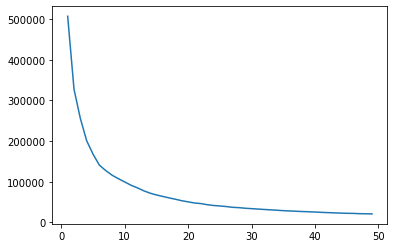

In [45]:
plt.plot(K, inertia_list)

In [117]:
#### Include Average Silhouette Method and Gap Statistic

In [41]:
km = KMeans(n_clusters = 25, random_state = 33)
km_df = pd.DataFrame(km.fit_transform(X))
km_df.head()

,0,1,2,3,4,5,6,7,8,9
0,2.448714,2.117872,0.513867,4.100073,2.427687,2.403172,2.640018,2.058338,2.309617,2.862813
1,2.561005,2.173200,0.789541,4.480448,2.473455,2.175799,2.652662,2.147726,2.339516,3.175165
2,2.533206,2.115958,0.670137,4.185687,2.374812,2.384700,2.555280,2.088395,2.359840,2.945102
3,2.533206,2.115958,0.670137,4.185687,2.374812,2.384700,2.555280,2.088395,2.359840,2.945102
4,2.555843,2.106722,0.707708,3.897036,2.310134,2.621148,2.484905,2.081358,2.430263,2.737245


In [42]:
km_df.set_index(features_unscaled.index, inplace = True)
km_df['Cluster'] = km.labels_
km_df.head()

,0,1,2,3,4,5,6,7,8,9,Cluster
LISTING_ID,,,,,,,,,,,
7075306172,2.448714,2.117872,0.513867,4.100073,2.427687,2.403172,2.640018,2.058338,2.309617,2.862813,2
7075321793,2.561005,2.173200,0.789541,4.480448,2.473455,2.175799,2.652662,2.147726,2.339516,3.175165,2
7075372720,2.533206,2.115958,0.670137,4.185687,2.374812,2.384700,2.555280,2.088395,2.359840,2.945102,2
7075376264,2.533206,2.115958,0.670137,4.185687,2.374812,2.384700,2.555280,2.088395,2.359840,2.945102,2
7075380613,2.555843,2.106722,0.707708,3.897036,2.310134,2.621148,2.484905,2.081358,2.430263,2.737245,2


<BarContainer object of 10 artists>

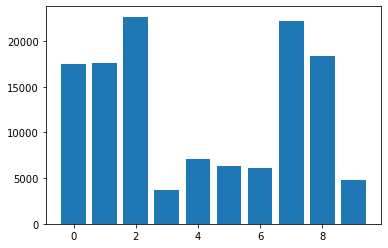

In [43]:
plt.bar(km_df.Cluster.value_counts().index, km_df.Cluster.value_counts())

#### Hierarchical Clustering

In [ ]:
# This almost crashed the pc

#agg = AgglomerativeClustering()
#agg.fit(X)
#agg_df = pd.DataFrame(agg.fit(X))
#agg_df.head()
#agg.distances_

#### DBSCAN

In [33]:
db = DBSCAN(eps=0.7, min_samples=100)
db.fit(X)

DBSCAN(eps=0.7, min_samples=100)

<BarContainer object of 5 artists>

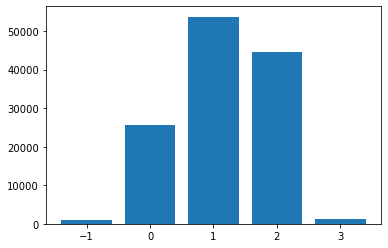

In [34]:
db_label_counts = pd.Series(db.labels_).value_counts().sort_index()
plt.bar(db_label_counts.index, db_label_counts)

In [37]:
db.core_sample_indices_.shape

(124201,)

In [40]:
pd.DataFrame(db.components_).head()

,0,1,2,3
0,0.142528,-0.072642,-0.319279,-1.198035
1,0.140276,-0.333165,-0.659378,-1.179699
2,0.171974,-0.066872,-0.485850,-1.199732
3,0.171974,-0.066872,-0.485850,-1.199732
4,0.207948,0.207137,-0.325405,-1.221788


In [ ]:
n_clusters = 10
model = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=500, n_init=15).fit(tfidf_data)

In [15]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(n_clusters):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :15]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 room
 floor
 bedroom
 larg
 kitchen
 live
 park
 unit
 close
 street
 hardwood
 walk
 new
 avail
 space
Cluster 1:
 apart
 commun
 todai
 featur
 home
 offer
 manag
 closet
 tour
 center
 amen
 contact
 park
 pet
 free
Cluster 2:
 loft
 maynard
 commun
 andov
 apart
 home
 worcest
 tour
 todai
 north
 contact
 vue
 lawrenc
 person
 indoor
Cluster 3:
 repres
 build
 unit
 apart
 daili
 finish
 date
 model
 subject
 vari
 flexibl
 chang
 actual
 plan
 avail
Cluster 4:
 discrimin
 statu
 advertis
 prestig
 person
 solut
 real
 estat
 genet
 martial
 arm
 prestigerentalsolut
 anti
 ancestri
 illeg
Cluster 5:
 squar
 maven
 cambridg
 davi
 fee
 bath
 refer
 realti
 dishwash
 avon
 negoti
 laundri
 hardwood
 includ
 municip
Cluster 6:
 avail
 rent
 includ
 hot
 properti
 monthb
 date
 info
 heat
 bath
 bu
 park
 water
 fee
 av
Cluster 7:
 place
 placesforless
 broker
 reach
 craigslist
 fee
 apart
 virtual
 onlin
 unit
 need
 tour
 brokerag
 brows
 http
Clu